In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/speech-based-classification-layer-7/valid.csv
/kaggle/input/speech-based-classification-layer-7/train.csv
/kaggle/input/speech-based-classification-layer-7/test.csv
/kaggle/input/dataset-meta-model-layer-7/layer_7_test.csv
/kaggle/input/dataset-meta-model-layer-7/layer_7_train.csv
/kaggle/input/dataset-meta-model-layer-7/layer_7_valid.csv


In [2]:
#define constants
LABELS = ['label_1', 'label_2', 'label_3', 'label_4']
FEATURES = ['feature_' + str(i) for i in range(1, 769)]
train_data_dict = {}
valid_data_dict = {}
target_label = 'label_1'

Import train, valid and test datasets.

In [3]:
#file paths for the datasets
train_path = '/kaggle/input/dataset-meta-model-layer-7/layer_7_train.csv'
valid_path = '/kaggle/input/dataset-meta-model-layer-7/layer_7_valid.csv'
test_path = '/kaggle/input/dataset-meta-model-layer-7/layer_7_test.csv'

#load the train dataset
train_data_set_original = pd.read_csv(train_path)

#load the valid dataset
valid_data_set_original = pd.read_csv(valid_path)

#load the test dataset
test_data_set_original = pd.read_csv(test_path)

Get the copies of train, valid and test datasets.

In [4]:
#get a copy of the train dataset
train_data_set = train_data_set_original.copy()

#get a copy of the valid dataset
valid_data_set = valid_data_set_original.copy()

#get a copy of the test dataset
test_data_set = test_data_set_original.copy()

Visualize train, valid and test datasets.

In [ ]:
train_data_set.head()

In [ ]:
valid_data_set.head()

In [ ]:
ID = test_data_set['ID'].to_numpy()

In [ ]:
test_data_set = test_data_set.drop(columns=['ID'])

Construct validation and training data for each label.

In [5]:
#loop through each label
for label in LABELS:
    #for train dataset
    train_data_dict[label] = train_data_set.drop(columns=[col for col in LABELS if col != label])
    
    #for valid dataset
    valid_data_dict[label] = valid_data_set.drop(columns=[col for col in LABELS if col != label])

Separate features in the train, valid and test datasets.

In [6]:
#seperate features and labels in train dataset.
train_features = train_data_set[FEATURES]
train_labels = train_data_set[LABELS]

#seperate features and labels in valid dataset.
valid_features = valid_data_set[FEATURES]
valid_labels = valid_data_set[LABELS]

#seperate features in test dataset.
test_features = test_data_set[FEATURES]

# Check for Outliers

Convert the training, validation, and test dataset features into NumPy arrays.

In [7]:
#convert the training dataset features to a NumPy array
train_features_array = train_features.to_numpy()

#convert the validation dataset features to a NumPy array
valid_features_array = valid_features.to_numpy()

#convert the test dataset features to a NumPy array
test_features_array = test_features.to_numpy()

In [8]:
#convert the training dataset features to a NumPy array
train_labels_array = train_labels.to_numpy()

#convert the validation dataset features to a NumPy array
valid_labels_array = valid_labels.to_numpy()

In [9]:
train_features_array.shape

(28520, 768)

Detecting outliers in the training dataset using **Isolation Forest** algorithm.

In [10]:
#create an Isolation Forest model with a specified contamination level
iso = IsolationForest(contamination=0.1)

#fit the Isolation Forest model to the training dataset features to identify outliers
yhat = iso.fit_predict(train_features_array)

Detecting outliers in the training dataset using **Local Outlier Factor (LOF)** algorithm.

In [11]:
#create a Local Outlier Factor model
lof = LocalOutlierFactor()

#fit the LOF model to the training dataset features for identifying outliers
yhat = lof.fit_predict(train_features_array)

Detecting outliers in the training datase using **One-Class SVM** algorithm.

In [12]:
#create a One-Class SVM (OCSVM) model
ocs = OneClassSVM(nu=0.01)

#fit the OCSVM model to the training dataset features to identify outliers
yhat = ocs.fit_predict(train_features_array)

Removes the rows associated with outliers.

In [13]:
#filter the training features array to exclude outliers
train_features_array = train_features_array[yhat != -1, :]

#filter the corresponding training labels array to maintain consistency
train_labels_array = train_labels_array[yhat != -1, :]

In [14]:
train_features_array.shape

(28233, 768)

# Label 1

**Data Preprocessing**

Drop the columns of the labels that contains null values.


In [15]:
#drop rows with null values in the target label column of the train dataset
train_data_dict['label_1'].dropna(subset=[train_data_dict['label_1'].columns[-1]], how='any', inplace=True)

Fill the null values in the features with their means in the train, valid and test datasets.

In [16]:
#fill null values with the mean in train data set.
train_data_dict['label_1'] = train_data_dict['label_1'].fillna(train_data_dict['label_1'].mean())

#fill null values with the mean in valid data set.
valid_data_dict['label_1'] = valid_data_dict['label_1'].fillna(valid_data_dict['label_1'].mean())

#fill null values with the mean in test data set.
test_data_set = test_data_set.fillna(test_data_set.mean())

Separate features and target label in the train, valid and test datasets.

In [17]:
#seperate features and labels in train dataset.
train_features_label_1 = train_data_dict['label_1'][FEATURES]
train_label_1 = train_data_dict['label_1']['label_1']

#seperate features and labels in valid dataset.
valid_features_label_1 = valid_data_dict['label_1'][FEATURES]
valid_label_1 = valid_data_dict['label_1']['label_1']

#seperate features in test dataset.
test_features_label_1 = test_data_set[FEATURES]

**Data Visualization**

Visualize the distribution of the label 1 in train dataset.

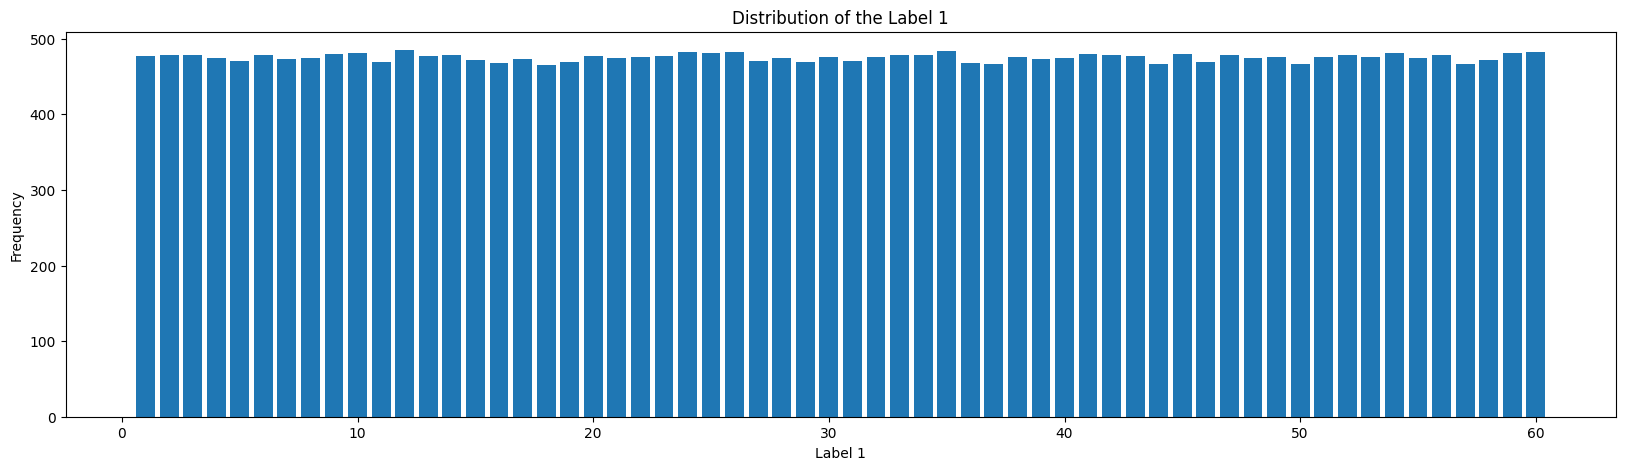

In [18]:
#plotting the distribution of target label in train dataset
labels, counts = np.unique(train_label_1, return_counts=True)
plt.figure(figsize=(20, 5))
plt.bar(labels, counts)
plt.xlabel('Label 1')
plt.ylabel('Frequency')
plt.title('Distribution of the Label 1')
plt.show()

**Feature Standardization**

Standarize the features in the train, valid and test datasets.

In [19]:
scaler = StandardScaler()

#standardize the features in train dataset
standardized_train_features_label_1 = scaler.fit_transform(train_features_label_1)

#standardize the features in valid dataset
standardized_valid_features_label_1 = scaler.transform(valid_features_label_1)

#standardize the features in test dataset
standardized_test_features_label_1 = scaler.transform(test_features_label_1)

**Feature Extraction**

Extract can combine the features that are highly significant in predicting the label using PCA.

Extract the features that can explain the variance of the label to 99%

Display the resulting explained variances of each principal component

In [20]:
variance_threshold = 0.97

#apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_label_1 = pca.fit_transform(standardized_train_features_label_1)
pca_valid_label_1 = pca.transform(standardized_valid_features_label_1)
pca_test_label_1 = pca.transform(standardized_test_features_label_1)

#explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_1.shape))
#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_1.shape))
#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_1.shape))

New Features in Train Dataset: (28520, 413)
New Features in Valid Dataset: (750, 413)
New Features in Test Dataset: (750, 413)


**Feature Selection**

Calculate the correlation matrix of the features in the train dataset.

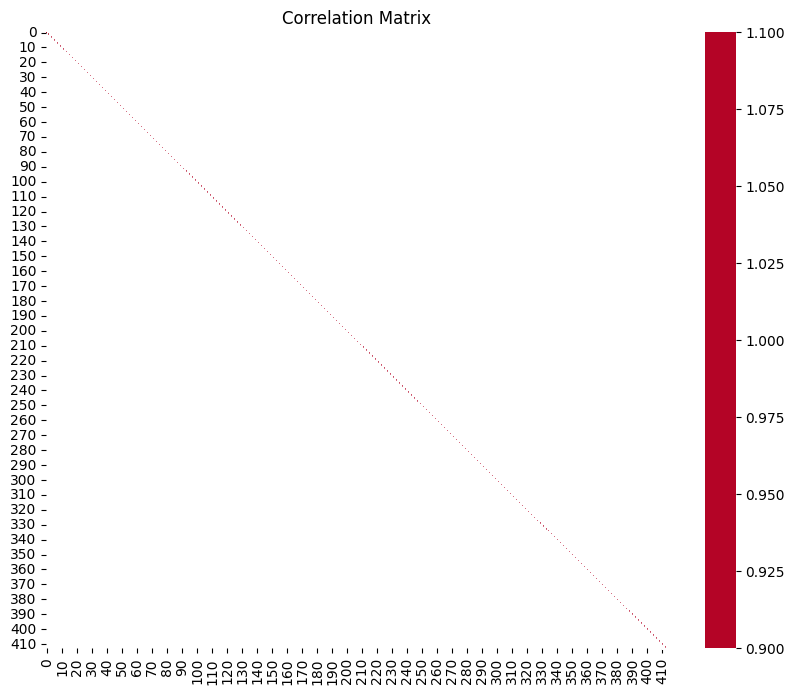

In [21]:
#calculate the correlation matrix
corr_matrix = pd.DataFrame(pca_train_label_1).corr()

#set the threshold for correlation
corr_threshold = 0.9

#get the filtered correlation matrix and plot it
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshold) | (corr_matrix < -corr_threshold)]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are most correlated with each other using the traning dataset. Threshold of 0.9 has been used to find the most correlated features.

In [22]:
most_correlated_features = set()

#get most correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            col_name = corr_matrix.columns[i]
            most_correlated_features.add(col_name)

Remove the previously identified highly correlated features from all the datasets.

In [23]:
#remove most correlated features
pca_train_label_1 = pd.DataFrame(pca_train_label_1).drop(columns=most_correlated_features)
pca_valid_label_1 = pd.DataFrame(pca_valid_label_1).drop(columns=most_correlated_features)
pca_test_label_1 = pd.DataFrame(pca_test_label_1).drop(columns=most_correlated_features)

Print the new shapes of all the datasets after removing the most correlated features.

In [24]:
#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_1.shape))

#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_1.shape))

#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_1.shape))

New Features in Train Dataset: (28520, 413)
New Features in Valid Dataset: (750, 413)
New Features in Test Dataset: (750, 413)


In [25]:
pca_train_label_1 = pca_train_label_1.to_numpy()
train_label_1 = train_label_1.to_numpy()

pca_valid_label_1 = pca_valid_label_1.to_numpy()
valid_label_1 = valid_label_1.to_numpy()

pca_test_label_1 = pca_test_label_1.to_numpy()

# Hyperparameter tuning

In [ ]:
svm_grid_params = {
    'C': [100, 1000],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

In [ ]:
classification_models_params = [
#     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
#     ('Random Forest', RandomForestClassifier(), rf_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_label_1, train_label_1)

    print(f"Best score for {model_name} : {rs_result.best_score_}")
    print(f"Best hyper parameters for {model_name} : {rs_result.best_params_}")

In [ ]:
#define a list of classification models
classification_models = [
#     ('K Neighbors', KNeighborsClassifier()),
#     ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(C=100, gamma=0.01, kernel='rbf'))
]

#number of features used in PCA
num_of_features = pca_train_label_1.shape[1]
print("Number of features: " + str(num_of_features) + "\n")

for model_name, model in classification_models:

  model.fit(pca_train_label_1, train_label_1)

  #predict on the train data
  pred_train_label_1 = model.predict(pca_train_label_1)

  #calculate metrics for classification evaluation on train data
  accuracy = accuracy_score(train_label_1, pred_train_label_1)
  precision = precision_score(train_label_1, pred_train_label_1, average='weighted', zero_division=1)
  recall = recall_score(train_label_1, pred_train_label_1, average='weighted')

  print("Metrics for " + str(model_name) + " on train data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  #predict on the validation data
  pred_valid_label_1 = model.predict(pca_valid_label_1)

  #calculate metrics for classification evaluation on validation data
  accuracy = accuracy_score(valid_label_1, pred_valid_label_1)
  precision = precision_score(valid_label_1, pred_valid_label_1, average='weighted', zero_division=1)
  recall = recall_score(valid_label_1, pred_valid_label_1, average='weighted')

  print("Metrics for " + str(model_name) + " on validation data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  pred_test_label_1 = model.predict(pca_test_label_1)


Number of features: 413



# Label 2

**Data Preprocessing**

Drop the columns of the labels that contains null values.

In [ ]:
#drop rows with null values in the target label column of the train dataset
train_data_dict['label_2'].dropna(subset=[train_data_dict['label_2'].columns[-1]], how='any', inplace=True)

Fill the null values in the features with their means in the train, valid and test datasets.

In [ ]:
#fill null values with the mean in train data set.
train_data_dict['label_2'] = train_data_dict['label_2'].fillna(train_data_dict['label_2'].mean())

#fill null values with the mean in valid data set.
valid_data_dict['label_2'] = valid_data_dict['label_2'].fillna(valid_data_dict['label_2'].mean())

#fill null values with the mean in test data set.
test_data_set = test_data_set.fillna(test_data_set.mean())

Separate features and target label in the train, valid and test datasets.

In [ ]:
#seperate features and labels in train dataset.
train_features_label_2 = train_data_dict['label_2'][FEATURES]
train_label_2 = train_data_dict['label_2']['label_2'].astype('int64')

#seperate features and labels in valid dataset.
valid_features_label_2 = valid_data_dict['label_2'][FEATURES]
valid_label_2 = valid_data_dict['label_2']['label_2'].astype('int64')

#seperate features in test dataset.
test_features_label_2 = test_data_set[FEATURES]

**Data Visualization**

Visualize the distribution of the label 1 in train dataset.

In [ ]:
#plotting the distribution of target label in train dataset
labels, counts = np.unique(train_label_2, return_counts=True)
plt.figure(figsize=(20, 5))
plt.bar(labels, counts)
plt.xlabel('Label 2')
plt.ylabel('Frequency')
plt.title('Distribution of the Label 2')
plt.show()

**Feature Standardization**

Standarize the features in the train, valid and test datasets.

In [ ]:
scaler = StandardScaler()

#standardize the features in train dataset
standardized_train_features_label_2 = scaler.fit_transform(train_features_label_2)

#standardize the features in valid dataset
standardized_valid_features_label_2 = scaler.transform(valid_features_label_2)

#standardize the features in test dataset
standardized_test_features_label_2 = scaler.transform(test_features_label_2)

**Feature Extraction**

Extract can combine the features that are highly significant in predicting the label using PCA.

Extract the features that can explain the variance of the label to 99%

Display the resulting explained variances of each principal component

In [ ]:
variance_threshold = 0.95

#apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_label_2 = pca.fit_transform(standardized_train_features_label_2)
pca_valid_label_2 = pca.transform(standardized_valid_features_label_2)
pca_test_label_2 = pca.transform(standardized_test_features_label_2)

#explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_2.shape))
#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_2.shape))
#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_2.shape))

**Feature Selection**

Calculate the correlation matrix of the features in the train dataset.

In [ ]:
#calculate the correlation matrix
corr_matrix = pd.DataFrame(pca_train_label_2).corr()

#set the threshold for correlation
corr_threshold = 0.9

#get the filtered correlation matrix and plot it
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshold) | (corr_matrix < -corr_threshold)]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are most correlated with each other using the traning dataset. Threshold of 0.9 has been used to find the most correlated features.

In [ ]:
most_correlated_features = set()

#get most correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            col_name = corr_matrix.columns[i]
            most_correlated_features.add(col_name)

Remove the previously identified highly correlated features from all the datasets.

In [ ]:
#remove most correlated features
pca_train_label_2 = pd.DataFrame(pca_train_label_2).drop(columns=most_correlated_features)
pca_valid_label_2 = pd.DataFrame(pca_valid_label_2).drop(columns=most_correlated_features)
pca_test_label_2 = pd.DataFrame(pca_test_label_2).drop(columns=most_correlated_features)

Print the new shapes of all the datasets after removing the most correlated features.

In [ ]:
#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_2.shape))

#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_2.shape))

#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_2.shape))

In [ ]:
pca_train_label_2 = pca_train_label_2.to_numpy()
train_label_2 = train_label_2.to_numpy()

pca_valid_label_2 = pca_valid_label_2.to_numpy()
valid_label_2 = valid_label_2.to_numpy()

pca_test_label_2 = pca_test_label_2.to_numpy()

# Hyperparameter tuning

In [ ]:
svm_grid_params = {
    'C': [100, 1000],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

In [ ]:
classification_models_params = [
#     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
#     ('Random Forest', RandomForestClassifier(), rf_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_label_2, train_label_2)

    print(f"Best score for {model_name} : {rs_result.best_score_}")
    print(f"Best hyper parameters for {model_name} : {rs_result.best_params_}")

In [ ]:
#define a list of classification models
classification_models = [
#     ('K Neighbors', KNeighborsClassifier()),
#     ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(C=100, gamma=0.01, kernel='rbf'))
]

#number of features used in PCA
num_of_features = pca_train_label_2.shape[1]
print("Number of features: " + str(num_of_features) + "\n")

for model_name, model in classification_models:

  model.fit(pca_train_label_2, train_label_2)

  #predict on the train data
  pred_train_label_2 = model.predict(pca_train_label_2)

  #calculate metrics for classification evaluation on train data
  accuracy = accuracy_score(train_label_2, pred_train_label_2)
  precision = precision_score(train_label_2, pred_train_label_2, average='weighted', zero_division=1)
  recall = recall_score(train_label_2, pred_train_label_2, average='weighted')

  print("Metrics for " + str(model_name) + " on train data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  #predict on the validation data
  pred_valid_label_2 = model.predict(pca_valid_label_2)

  #calculate metrics for classification evaluation on validation data
  accuracy = accuracy_score(valid_label_2, pred_valid_label_2)
  precision = precision_score(valid_label_2, pred_valid_label_2, average='weighted', zero_division=1)
  recall = recall_score(valid_label_2, pred_valid_label_2, average='weighted')

  print("Metrics for " + str(model_name) + " on validation data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  pred_test_label_2 = model.predict(pca_test_label_2)


# Label 3

**Data Preprocessing**

Drop the columns of the labels that contains null values.

In [ ]:
#drop rows with null values in the target label column of the train dataset
train_data_dict['label_3'].dropna(subset=[train_data_dict['label_3'].columns[-1]], how='any', inplace=True)

Fill the null values in the features with their means in the train, valid and test datasets.

In [ ]:
#fill null values with the mean in train data set.
train_data_dict['label_3'] = train_data_dict['label_3'].fillna(train_data_dict['label_3'].mean())

#fill null values with the mean in valid data set.
valid_data_dict['label_3'] = valid_data_dict['label_3'].fillna(valid_data_dict['label_3'].mean())

#fill null values with the mean in test data set.
test_data_set = test_data_set.fillna(test_data_set.mean())

Separate features and target label in the train, valid and test datasets.

In [ ]:
#seperate features and labels in train dataset.
train_features_label_3 = train_data_dict['label_3'][FEATURES]
train_label_3 = train_data_dict['label_3']['label_3']

#seperate features and labels in valid dataset.
valid_features_label_3 = valid_data_dict['label_3'][FEATURES]
valid_label_3 = valid_data_dict['label_3']['label_3']

#seperate features in test dataset.
test_features_label_3 = test_data_set[FEATURES]

**Data Visualization**

Visualize the distribution of the label 1 in train dataset.

In [ ]:
#plotting the distribution of target label in train dataset
labels, counts = np.unique(train_label_3, return_counts=True)
plt.figure(figsize=(20, 5))
plt.bar(labels, counts)
plt.xlabel('Label 3')
plt.ylabel('Frequency')
plt.title('Distribution of the Label 3')
plt.show()

**Feature Standardization**

Standarize the features in the train, valid and test datasets.

In [ ]:
scaler = StandardScaler()

#standardize the features in train dataset
standardized_train_features_label_3 = scaler.fit_transform(train_features_label_3)

#standardize the features in valid dataset
standardized_valid_features_label_3 = scaler.transform(valid_features_label_3)

#standardize the features in test dataset
standardized_test_features_label_3 = scaler.transform(test_features_label_3)

**Feature Extraction**

Extract can combine the features that are highly significant in predicting the label using PCA.

Extract the features that can explain the variance of the label to 99%

Display the resulting explained variances of each principal component

In [ ]:
variance_threshold = 0.96

#apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_label_3 = pca.fit_transform(standardized_train_features_label_3)
pca_valid_label_3 = pca.transform(standardized_valid_features_label_3)
pca_test_label_3 = pca.transform(standardized_test_features_label_3)

#explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_3.shape))
#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_3.shape))
#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_3.shape))

**Feature Selection**

Calculate the correlation matrix of the features in the train dataset.

In [ ]:
#calculate the correlation matrix
corr_matrix = pd.DataFrame(pca_train_label_3).corr()

#set the threshold for correlation
corr_threshold = 0.9

#get the filtered correlation matrix and plot it
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshold) | (corr_matrix < -corr_threshold)]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are most correlated with each other using the traning dataset. Threshold of 0.9 has been used to find the most correlated features.

In [ ]:
most_correlated_features = set()

#get most correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            col_name = corr_matrix.columns[i]
            most_correlated_features.add(col_name)

Remove the previously identified highly correlated features from all the datasets.

In [ ]:
#remove most correlated features
pca_train_label_3 = pd.DataFrame(pca_train_label_3).drop(columns=most_correlated_features)
pca_valid_label_3 = pd.DataFrame(pca_valid_label_3).drop(columns=most_correlated_features)
pca_test_label_3 = pd.DataFrame(pca_test_label_3).drop(columns=most_correlated_features)

Print the new shapes of all the datasets after removing the most correlated features.

In [ ]:
#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_3.shape))

#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_3.shape))

#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_3.shape))

In [ ]:
pca_train_label_3 = pca_train_label_3.to_numpy()
train_label_3 = train_label_3.to_numpy()

pca_valid_label_3 = pca_valid_label_3.to_numpy()
valid_label_3 = valid_label_3.to_numpy()

pca_test_label_3 = pca_test_label_3.to_numpy()

# Hyperparameter tuning

In [ ]:
svm_grid_params = {
    'C': [100, 1000],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

In [ ]:
classification_models_params = [
#     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
#     ('Random Forest', RandomForestClassifier(), rf_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_label_3, train_label_3)

    print(f"Best score for {model_name} : {rs_result.best_score_}")
    print(f"Best hyper parameters for {model_name} : {rs_result.best_params_}")

In [ ]:
#define a list of classification models
classification_models = [
#     ('K Neighbors', KNeighborsClassifier()),
#     ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(C=100, gamma=0.01, kernel='rbf'))
]

#number of features used in PCA
num_of_features = pca_train_label_3.shape[1]
print("Number of features: " + str(num_of_features) + "\n")

for model_name, model in classification_models:

  model.fit(pca_train_label_3, train_label_3)

  #predict on the train data
  pred_train_label_3 = model.predict(pca_train_label_3)

  #calculate metrics for classification evaluation on train data
  accuracy = accuracy_score(train_label_3, pred_train_label_3)
  precision = precision_score(train_label_3, pred_train_label_3, average='weighted', zero_division=1)
  recall = recall_score(train_label_3, pred_train_label_3, average='weighted')

  print("Metrics for " + str(model_name) + " on train data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  #predict on the validation data
  pred_valid_label_3 = model.predict(pca_valid_label_3)

  #calculate metrics for classification evaluation on validation data
  accuracy = accuracy_score(valid_label_3, pred_valid_label_3)
  precision = precision_score(valid_label_3, pred_valid_label_3, average='weighted', zero_division=1)
  recall = recall_score(valid_label_3, pred_valid_label_3, average='weighted')

  print("Metrics for " + str(model_name) + " on validation data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  pred_test_label_3 = model.predict(pca_test_label_3)


# Label 4

**Data Preprocessing**

Drop the columns of the labels that contains null values.

In [ ]:
#drop rows with null values in the target label column of the train dataset
train_data_dict['label_4'].dropna(subset=[train_data_dict['label_4'].columns[-1]], how='any', inplace=True)

Fill the null values in the features with their means in the train, valid and test datasets.

In [ ]:
#fill null values with the mean in train data set.
train_data_dict['label_4'] = train_data_dict['label_4'].fillna(train_data_dict['label_4'].mean())

#fill null values with the mean in valid data set.
valid_data_dict['label_4'] = valid_data_dict['label_4'].fillna(valid_data_dict['label_4'].mean())

#fill null values with the mean in test data set.
test_data_set = test_data_set.fillna(test_data_set.mean())

Separate features and target label in the train, valid and test datasets.

In [ ]:
#seperate features and labels in train dataset.
train_features_label_4 = train_data_dict['label_4'][FEATURES]
train_label_4 = train_data_dict['label_4']['label_4']

#seperate features and labels in valid dataset.
valid_features_label_4 = valid_data_dict['label_4'][FEATURES]
valid_label_4 = valid_data_dict['label_4']['label_4']

#seperate features in test dataset.
test_features_label_4 = test_data_set[FEATURES]

**Data Visualization**

Visualize the distribution of the label 1 in train dataset.

In [ ]:
#plotting the distribution of target label in train dataset
labels, counts = np.unique(train_label_4, return_counts=True)
plt.figure(figsize=(20, 5))
plt.bar(labels, counts)
plt.xlabel('Label 4')
plt.ylabel('Frequency')
plt.title('Distribution of the Label 4')
plt.show()

**Feature Standardization**

Standarize the features in the train, valid and test datasets.

In [ ]:
scaler = StandardScaler()

#standardize the features in train dataset
standardized_train_features_label_4 = scaler.fit_transform(train_features_label_4)

#standardize the features in valid dataset
standardized_valid_features_label_4 = scaler.transform(valid_features_label_4)

#standardize the features in test dataset
standardized_test_features_label_4 = scaler.transform(test_features_label_4)

**Feature Extraction**

Extract can combine the features that are highly significant in predicting the label using PCA.

Extract the features that can explain the variance of the label to 99%

Display the resulting explained variances of each principal component

In [ ]:
variance_threshold = 0.95

#apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_label_4 = pca.fit_transform(standardized_train_features_label_4)
pca_valid_label_4 = pca.transform(standardized_valid_features_label_4)
pca_test_label_4 = pca.transform(standardized_test_features_label_4)

#explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_

#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_4.shape))
#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_4.shape))
#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_4.shape))

**Feature Selection**

Calculate the correlation matrix of the features in the train dataset.

In [ ]:
#calculate the correlation matrix
corr_matrix = pd.DataFrame(pca_train_label_4).corr()

#set the threshold for correlation
corr_threshold = 0.9

#get the filtered correlation matrix and plot it
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_threshold) | (corr_matrix < -corr_threshold)]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.title("Correlation Matrix")
plt.show()

Identify the features that are most correlated with each other using the traning dataset. Threshold of 0.9 has been used to find the most correlated features.

In [ ]:
most_correlated_features = set()

#get most correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            col_name = corr_matrix.columns[i]
            most_correlated_features.add(col_name)

Remove the previously identified highly correlated features from all the datasets.

In [ ]:
#remove most correlated features
pca_train_label_4 = pd.DataFrame(pca_train_label_4).drop(columns=most_correlated_features)
pca_valid_label_4 = pd.DataFrame(pca_valid_label_4).drop(columns=most_correlated_features)
pca_test_label_4 = pd.DataFrame(pca_test_label_4).drop(columns=most_correlated_features)

Print the new shapes of all the datasets after removing the most correlated features.

In [ ]:
#print the new feature count in train dataset
print("New Features in Train Dataset: {}".format(pca_train_label_4.shape))

#print the new feature count in valid dataset
print("New Features in Valid Dataset: {}".format(pca_valid_label_4.shape))

#print the new feature count in test dataset
print("New Features in Test Dataset: {}".format(pca_test_label_4.shape))

In [ ]:
pca_train_label_4 = pca_train_label_4.to_numpy()
train_label_4 = train_label_4.to_numpy()

pca_valid_label_4 = pca_valid_label_4.to_numpy()
valid_label_4 = valid_label_4.to_numpy()

pca_test_label_4 = pca_test_label_4.to_numpy()

# Hyperparameter tuning

In [ ]:
svm_grid_params = {
    'C': [100, 1000],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

In [ ]:
classification_models_params = [
#     ('K Neighbors', KNeighborsClassifier(), knn_grid_params),
#     ('Random Forest', RandomForestClassifier(), rf_grid_params),
    ('SVM', SVC(), svm_grid_params)
]

for model_name, model, grid_params in classification_models_params:
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rs = RandomizedSearchCV(
        estimator = model,
        param_distributions = grid_params,
        n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
    )
    rs_result = rs.fit(pca_train_label_4, train_label_4)

    print(f"Best score for {model_name} : {rs_result.best_score_}")
    print(f"Best hyper parameters for {model_name} : {rs_result.best_params_}")

In [ ]:
#define a list of classification models
classification_models = [
#     ('K Neighbors', KNeighborsClassifier()),
#     ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(C=100, gamma=0.01, kernel='rbf'))
]

#number of features used in PCA
num_of_features = pca_train_label_4.shape[1]
print("Number of features: " + str(num_of_features) + "\n")

for model_name, model in classification_models:

  model.fit(pca_train_label_4, train_label_4)

  #predict on the train data
  pred_train_label_4 = model.predict(pca_train_label_3)

  #calculate metrics for classification evaluation on train data
  accuracy = accuracy_score(train_label_4, pred_train_label_4)
  precision = precision_score(train_label_4, pred_train_label_4, average='weighted', zero_division=1)
  recall = recall_score(train_label_4, pred_train_label_4, average='weighted')

  print("Metrics for " + str(model_name) + " on train data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  #predict on the validation data
  pred_valid_label_4 = model.predict(pca_valid_label_3)

  #calculate metrics for classification evaluation on validation data
  accuracy = accuracy_score(valid_label_4, pred_valid_label_4)
  precision = precision_score(valid_label_4, pred_valid_label_4, average='weighted', zero_division=1)
  recall = recall_score(valid_label_4, pred_valid_label_4, average='weighted')

  print("Metrics for " + str(model_name) + " on validation data:")
  print("Accuracy: " + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("\n")

  pred_test_label_4 = model.predict(pca_test_label_4)


# Create the CSV file.

Define method to create the csv file.

In [ ]:
# define method to create the dataframe and save it as a csv file
def create_csv(destination, ID, label_1_pred, label_2_pred, label_3_pred, label_4_pred):
  df = pd.DataFrame()
  
  df.insert(loc=0, column='ID', value=ID)
  df.insert(loc=1, column='label_1', value=label_1_pred)
  df.insert(loc=2, column='label_2', value=label_2_pred)
  df.insert(loc=3, column='label_3', value=label_3_pred)
  df.insert(loc=4, column='label_4', value=label_4_pred)

  df.to_csv(destination, index=False)

Save the csv file.

In [ ]:
destination = '190583V_output_l7.csv'

# create the csv output file
create_csv(destination, ID, pred_test_label_1, pred_test_label_2, pred_test_label_3, pred_test_label_4)